## Scikit-tda module

Some Python resources I found online that can compute different kinds of distance between Persistance Diagrams (PDs).
1. [GUDHI](https://gudhi.inria.fr/python/latest/) python documentation resources:
    * [Bottleneck distance](https://gudhi.inria.fr/python/latest/bottleneck_distance_user.html)
    * [Wasserstein distance](https://gudhi.inria.fr/python/latest/wasserstein_distance_user.html)

2. [scikit-tda](https://docs.scikit-tda.org/en/latest/notebooks/scikit-tda%20Tutorial.html)
    * [persim](https://docs.scikit-tda.org/en/latest/notebooks/scikit-tda%20Tutorial.html#2.1.-Distance-between-diagrams)
    * [persim documentation](https://persim.scikit-tda.org/en/latest/notebooks/distances.html)
    
3. [giotto-tda](https://giotto-ai.github.io/gtda-docs/0.5.1/notebooks/index.html#notebooks-index)
    * [PairwiseDistance](https://giotto-ai.github.io/gtda-docs/0.2.0/modules/generated/diagrams/distances/gtda.diagrams.PairwiseDistance.html) function in `diagrams` module.

In [19]:
# import necessary modules
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm            # cm stands for colormaps
from sklearn.metrics.pairwise import pairwise_distances

# TDA related modules
import tadasets                      # tadasets: has useful datasets for TDA (or TaDA)
import ripser                        # to compute Persistance Diagrams (PDs)
import persim                        # to plot PDs
from ripser import Rips

In [4]:
# generate dataset

np.random.seed(565656)

data_clean = tadasets.dsphere(d = 1,          # sample from d-dim sphere
                              n = 100,        # sample n points
                              noise = 0.0)    # StdDev of normal noise added to data 

data_noisy = tadasets.dsphere(d = 1,          # sample from d-dim sphere
                              n = 100,        # sample n points
                              noise = 0.10)    # StdDev of normal noise added to data 

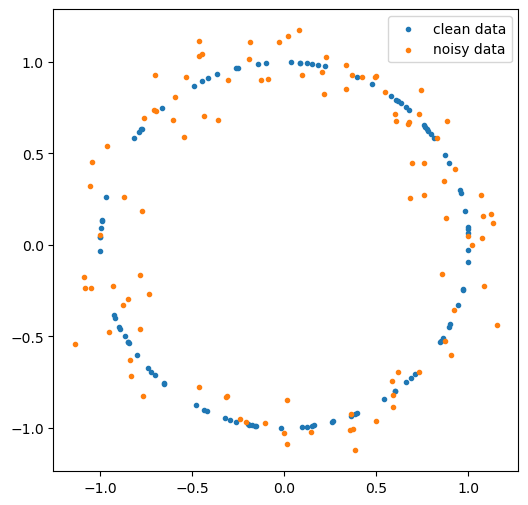

In [10]:
plt.rcParams["figure.figsize"] = (6,6)                                                   # adjusts size of output plot
plt.scatter(x = data_clean[:,0], y = data_clean[:,1], label = "clean data", s = 9)       # s controls size of dot
plt.scatter(x = data_noisy[:,0], y = data_noisy[:,1], label = "noisy data", s = 9)
plt.legend()
plt.show()

**Computing and Plotting PDs**

Option 1: `ripser.ripser` followed by `persim.plot_diagrams`


```
ripser.ripser(X,                                                   # an ndarray or distance matrix
             maxdim=1,                                             # max homology dim to compute
             thresh=inf, coeff=2,                                  # scale at which to construct filteration
             distance_matrix=False, ....)
```

Option 2: Import `Rips` from `ripser`.  Use `rips.transform` followed by `rips.plot`

```
rips = Rips()
data_dgm = rips.transform(dataset)                                # construct Rips complex
rips.plot(show = True, title = "Title here")                      # plot PD

```

In [12]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i,d in enumerate(dgms)])

In [31]:
dgm_obj = ripser.ripser(X = data_clean)

# dictionary type object
type(dgm_obj)

dgm_obj.keys()

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])

In [39]:
barcodes = dgm_obj["dgms"]
# list of barcodes
type(barcodes)

# list of two elements: barcodes corresponding to H0 and H1
len(barcodes)

# barcodes corresponding to H0
len(barcodes[0])

# barcodes corresponding to H1
len(barcodes[1])

1

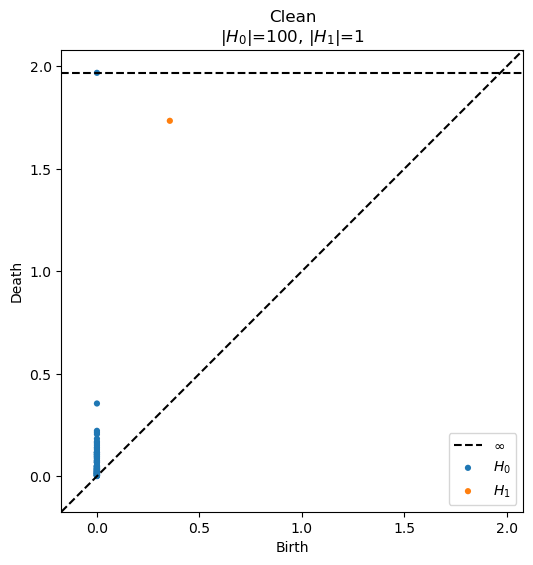

In [14]:
# Ref for syntax: https://ripser.scikit-tda.org/en/latest/reference/stubs/ripser.ripser.html
# Ripser can take both data and paiwise distance matrix as input

dgm_clean = ripser.ripser(X = data_clean)['dgms']
persim.plot_diagrams(dgm_clean, show = True, title = f"Clean\n{diagram_sizes(dgm_clean)}")                

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


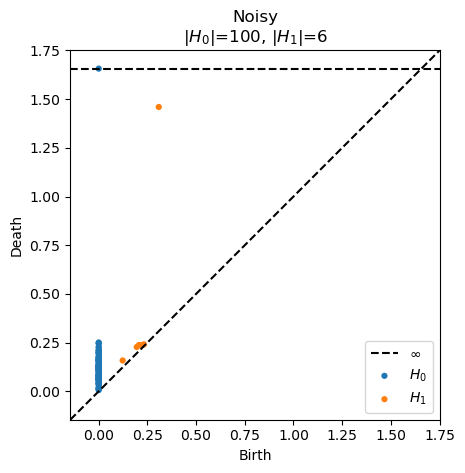

In [18]:
rips = Rips()
dgm_noisy = rips.transform(data_noisy)
rips.plot(show = True, title = f"Noisy\n{diagram_sizes(dgm_noisy)}" )

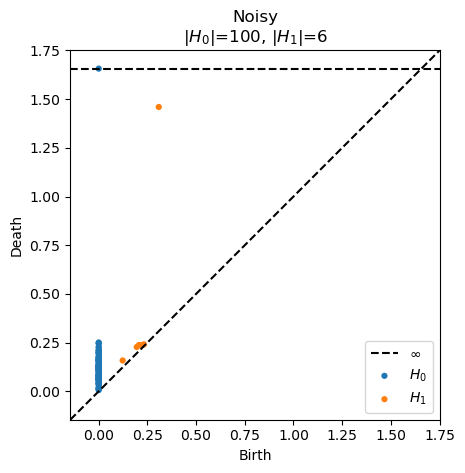

In [25]:
# Ripser can take both data and paiwise distance matrix as input

D = pairwise_distances(data_noisy)     # default metric is Euclidean
D.ndim

dgm_noisy = ripser.ripser(D, distance_matrix = True)['dgms']
persim.plot_diagrams(dgm_noisy, show = True, title = f"Noisy\n{diagram_sizes(dgm_noisy)}")

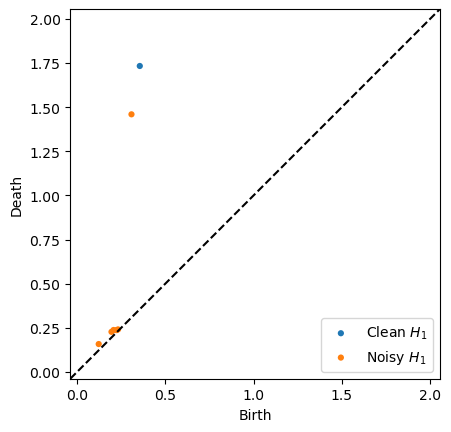

In [26]:
# multiple PDs on the same plot
dgms_clean = ripser.ripser(data_clean)['dgms']
dgms_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    [dgms_clean[1], dgms_noisy[1]],
    labels=['Clean $H_1$', 'Noisy $H_1$'],
    show=True
)

**Computing Distance between PDs**: https://persim.scikit-tda.org/en/latest/notebooks/distances.html

The `persim` package has implementations for different distance functions on the space of PDs.

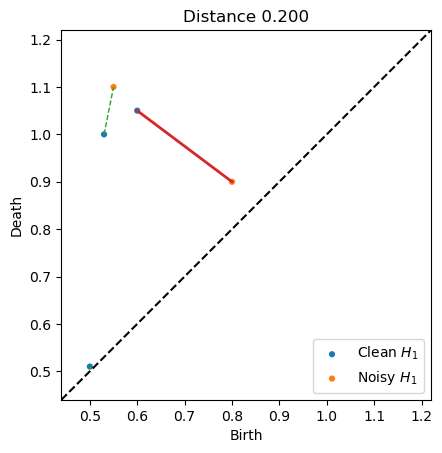

In [47]:
## simple example to understand syntax
dgm1 = np.array([
    [0.6, 1.05],
    [0.53, 1],
    [0.5, 0.51]
])
dgm2 = np.array([
    [0.55, 1.1],
    [0.8,0.9]
])

d, matching = persim.bottleneck(
    dgm1,
    dgm2,
    matching=True
)

persim.bottleneck_matching(dgm1, dgm2, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.title("Distance {:.3f}".format(d))
plt.show()

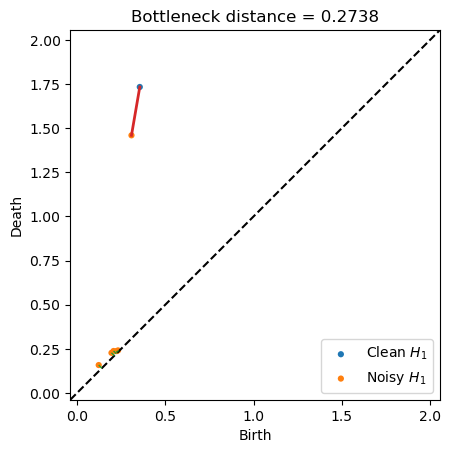

In [44]:
# focus on barcodes corresponding to H1
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]

# The bottleneck of the matching is shown as a red line,
# while the other pairs in the perfect matching which are less than the diagonal are shown as green lines
# (NOTE: There may be many possible matchings with the minimum bottleneck, and this returns an arbitrary one)
distance_bottleneck, matching = persim.bottleneck(dgm1 = dgm_clean, 
                                                  dgm2 = dgm_noisy, 
                                                  matching=True)

persim.bottleneck_matching(
    dgm_clean, dgm_noisy, matching,
    labels=['Clean $H_1$', 'Noisy $H_1$']
)
plt.title(f"Bottleneck distance = {distance_bottleneck:0.4f}",)
plt.show()

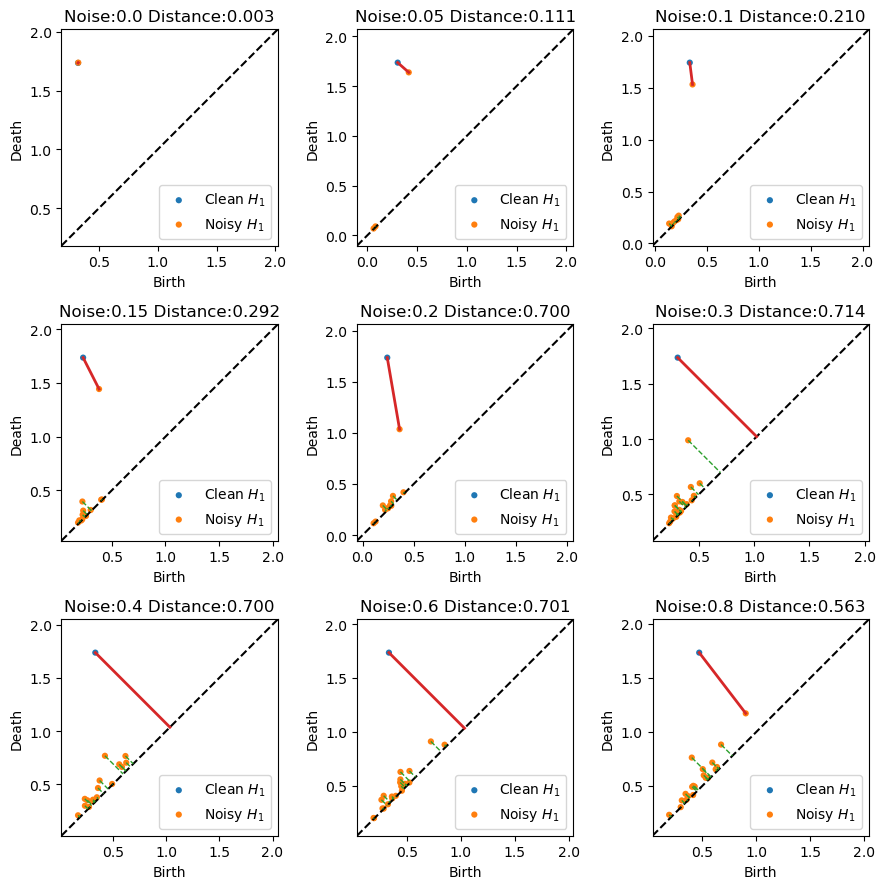

In [53]:
plt.figure(figsize=(9,9))
for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
    dgm_clean = ripser.ripser(ds_clean)['dgms'][1]

    ds = tadasets.dsphere(d=1, n=100, noise=n)
    dgm = ripser.ripser(ds)['dgms'][1]

    d, matching = persim.bottleneck(
        dgm_clean,
        dgm,
        matching=True
    )

    persim.bottleneck_matching(dgm_clean, dgm, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])

    plt.title("Noise:{} Distance:{:.3f}".format(n, d))

plt.tight_layout()
plt.show()



## Refereces
1. Saul, Nathaniel and Tralie, Chris. (2019). Scikit-TDA: Topological Data Analysis for Python. Zenodo. http://doi.org/10.5281/zenodo.2533369